<a href="https://colab.research.google.com/github/Ihsan1331/NLP_Course/blob/main/Intro_to_NLP_Ch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Prerequisites
---

link: https://huggingface.co/learn/nlp-course/chapter5/1?fw=pt

In [1]:
!pip install datasets -q
!pip install transformers[torch] -q
!pip install accelerate -U -q
!pip install evaluate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


# 1. Introduction

# 2. What if my dataset isn’t on the Hub?


## 2.1 Local and Remote Dataset
---
HF Dataset support dengan berbagai tipe
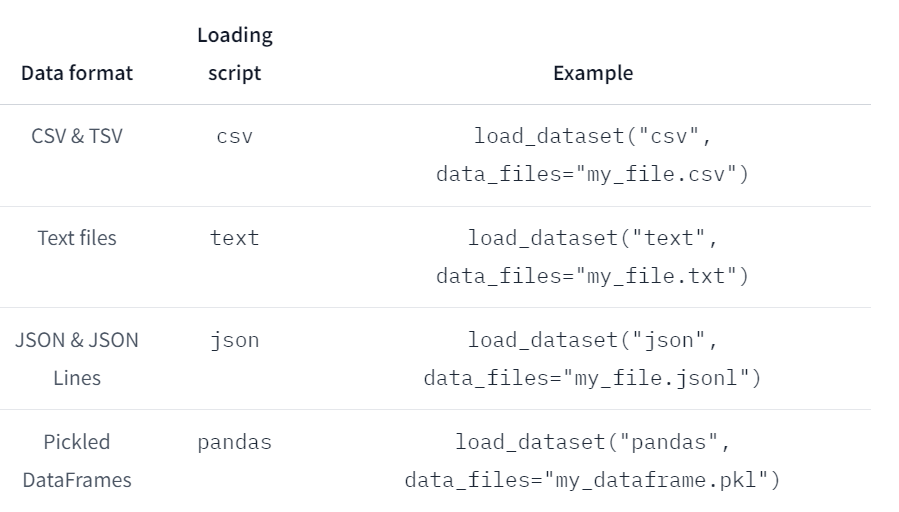

## 2.2 Loading Local Dataset
---
Buat contoh akan pakai SQuAD-it dataset, dataset skala besar untuk tanay jawab dalam bahasa italia

train dan test telah dibagi dalam GitHub

In [2]:
# download dataset dari GitHub
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-test.json.gz

--2024-01-28 12:24:16--  https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz [following]
--2024-01-28 12:24:17--  https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7725286 (7.4M) [application/octet-stream]
Saving to: ‘SQuAD_it-train.json.gz’

SQuAD_it-train.json 100%[===================>]   7.37M  --.-KB/s    in 0.06s   

2024-01-28 12:24:17 (125 MB/s) - ‘SQuAD_it-train.json.gz’ saved [7725286/7725286]

--2024

In [3]:
#decompress dataset
!gzip -dkv SQuAD_it-*.json.gz

SQuAD_it-test.json.gz:	 87.5% -- created SQuAD_it-test.json
SQuAD_it-train.json.gz:	 82.3% -- created SQuAD_it-train.json


In [4]:
#load the dataset
from datasets import load_dataset

squad_it_dataset = load_dataset("json", data_files="SQuAD_it-train.json", field="data")

Generating train split: 0 examples [00:00, ? examples/s]

In [8]:
squad_it_dataset

DatasetDict({
    train: Dataset({
        features: ['paragraphs', 'title'],
        num_rows: 442
    })
})

cara diatas hanya ngeload dataset untuk train saja, buat bisa masukin dataset untuk test ke dalam DatasetDict bisa dengan

In [9]:
data_files = {"train": "SQuAD_it-train.json", "test": "SQuAD_it-test.json"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")
squad_it_dataset

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['paragraphs', 'title'],
        num_rows: 442
    })
    test: Dataset({
        features: ['paragraphs', 'title'],
        num_rows: 48
    })
})

kita bisa juga langsung mauskin tanpa harus decompress terlebih dahulu

In [10]:
data_files = {"train": "SQuAD_it-train.json.gz", "test": "SQuAD_it-test.json.gz"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

## 2.3 Loading Remote Dataset
---
hampir sama kayak load dataset dari local cuman sekarang perlu ngasih link dataset

In [11]:
url = "https://github.com/crux82/squad-it/raw/master/"
data_files = {
    "train": url + "SQuAD_it-train.json.gz",
    "test": url + "SQuAD_it-test.json.gz",
}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [12]:
squad_it_dataset

DatasetDict({
    train: Dataset({
        features: ['paragraphs', 'title'],
        num_rows: 442
    })
    test: Dataset({
        features: ['paragraphs', 'title'],
        num_rows: 48
    })
})

# 3. Time to Slice and Dice
---
buat contoh akan menggunakan Drug Review Dataset yang ada di UC Irvine Machine Learning Repository

In [13]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip"
!unzip drugsCom_raw.zip

--2024-01-28 12:32:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip        [   <=>              ]  41.00M  93.1MB/s    in 0.4s    

2024-01-28 12:32:50 (93.1 MB/s) - ‘drugsCom_raw.zip’ saved [42989872]

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [19]:
#load dataset
data_files = {"train": "drugsComTrain_raw.tsv", "test": "drugsComTest_raw.tsv"}
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [24]:
#shuffle dan ngambil 1000 sample
drug_sample = drug_dataset["train"].shuffle(seed=42).select(range(1000))
#Lihat dataset
drug_sample[:3]

{'Unnamed: 0': [87571, 178045, 80482],
 'drugName': ['Naproxen', 'Duloxetine', 'Mobic'],
 'condition': ['Gout, Acute', 'ibromyalgia', 'Inflammatory Conditions'],
 'review': ['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
  '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects."',
  '"I have been taking Mobic for over a year with no side effects other than 

* Unnamed: 0 adalah ID
* kolom kondisi berisi gabungan antara huruf kecil dan huruf besar
* review berisi teks yang berbeda beda panjangnya dan gabungan antara python line separator (\r\n) dan juga HTML

In [25]:
# gunakan Dataset.unique() untuk mengecek apakah Unnamed: 0 adalah ID dengan menyamakan nomor ID dengan nomor baris
for split in drug_dataset.keys():
    assert len(drug_dataset[split]) == len(drug_dataset[split].unique("Unnamed: 0"))

In [ ]:
#buat lihat nama nama drug yang dipakai apa aja
drug_dataset[split].unique("drugName")

In [26]:
# rename kolom Unnamed: 0 menjadi patient_id
drug_dataset = drug_dataset.rename_column(
    original_column_name="Unnamed: 0", new_column_name="patient_id"
)
drug_dataset

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 161297
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53766
    })
})

In [29]:
# hapus None entri di dataset
drug_dataset = drug_dataset.filter(lambda x: x["condition"] is not None)

Filter:   0%|          | 0/161297 [00:00<?, ? examples/s]

Filter:   0%|          | 0/53766 [00:00<?, ? examples/s]

In [30]:
# lowercase semua data dalam kolom condition
def lowercase_condition(example):
    return {"condition": example["condition"].lower()}


drug_dataset.map(lowercase_condition)

Map:   0%|          | 0/160398 [00:00<?, ? examples/s]

Map:   0%|          | 0/53471 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 160398
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53471
    })
})

In [31]:
# buat cek apakah sudah di lowercase semua
drug_dataset["train"]["condition"][:3]

['Left Ventricular Dysfunction', 'ADHD', 'Birth Control']

## 3.2 Buat Kolom Baru